# <h><font color="red">TSNE VISUALISATION</font></h>

* <h><font color="blue">TSNE stands for t-distributed stochastic Neighborhood Embedding</font></h>
* <h><font color="blue">It is the state of the art data visualisation technique developed by van der Maaten & Jefrey Hinton in 2008.</font></h>
* nD-dim---->2D-dim
* pca preserves global shape or structure of the data and it won't preserves local structure where as tsne is a complex phenomenon tries to preserve local and global structure
* Neighborhood is the point which is closest and surronding our query point
* Embedding means nothing but projecting the points from nD plane to 2D plane
* Sometimes,it is impossible to preserve neighborhood distance,it is called "CROWDING PROBLEM".
* stochastic means not determenistic or probabilistic.
* t-sne is an iterative algorithm.
* t-sne algorithm adapts its notion of distance to regional density variation in data set.

* The parameters are:
> * perplexity
> * steps
* Relatie size of clusters can't be seen
* perplexity can be taken as how to balance attention between local and global aspects of data(generally lies between 5~50).
* Perplexity should always be less than no of points.
* No of iterations should be upto stable configuration.
* We must analyse multiple knots with multiple perplexities.
* t-sne tends to expand dense regions data.
* Distance between clusters might not give any Information.


![alt text](https://drive.google.com/uc?id=1XE6hAucAJrJIJq0IYdW2JtAk54BmfSVl)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [3]:
data = pd.read_csv("/content/drive/My Drive/Data_Scientist/pca-tsne/sign_mnist_train.csv")
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [4]:
data.shape

(27455, 785)

In [5]:
labels = data['label']
data = data.drop('label',axis= 1)
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [6]:
print(labels.shape)

(27455,)


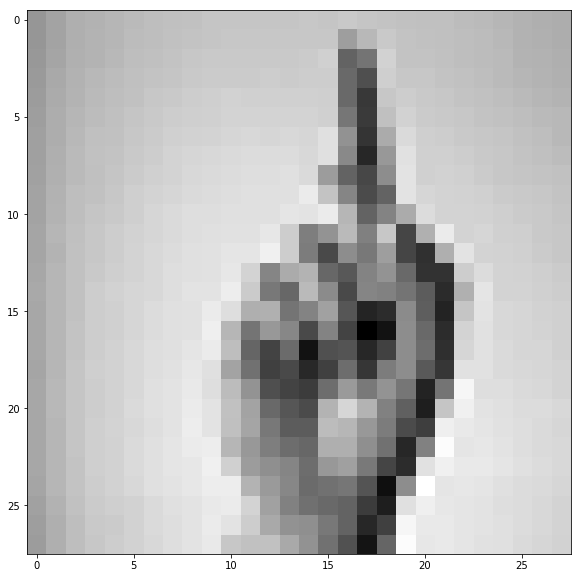

3


In [7]:
plt.figure(figsize=(10,10))
ids = 24

data_matrix = data.iloc[ids].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(data_matrix, interpolation = "none", cmap = "gray")
plt.show()

print(labels[ids])

***TSNE is complex algorithm so i consider it for 2k data points only.***

In [12]:
data = data.head(2000)
labels = labels.head(2000)
print("The shape of the data becomes",data.shape," and labels become",labels.shape)

The shape of the data becomes (2000, 784)  and labels become (2000,)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardised_data = scaler.fit_transform(data)
print("The standardised data shape is",standardised_data.shape)

The standardised data shape is (2000, 784)


In [0]:
words_dict ={
    0:'A',
    1:'B',
    2:'C',
    3:'D',
    4:'E',
    5:'F',
    6:'G',
    7:'H',
    8:'I',
    9:'J',
    10:'K',
    11:'L',
    12:'M',
    13:'N',
    14:'O',
    15:'P',
    16:'Q',
    17:'R',
    18:'S',
    19:'T',
    20:'U',
    21:'V',
    22:'W',
    23:'X',
    24:'Y',
    25:'Z'
}

In [15]:
words_dict[24]

'Y'

In [16]:
for i in range(len(labels)) :
  if(labels[i] in words_dict.keys()) :
    labels[i] = words_dict[labels[i]]
labels = pd.Series(labels)
print(labels.head())

0    D
1    G
2    C
3    C
4    N
Name: label, dtype: object


In [17]:
labels[24]

'D'

# TSNE parameter tuning

* ***Learning rate is set default to 200***
* ***Default perplexity is 30***
* ***Defalut No of iterations or steps is 1000***

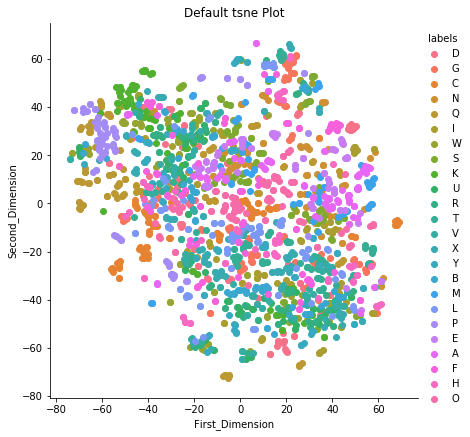

In [19]:
from sklearn.manifold import TSNE


final_data = standardised_data
final_labels = labels

model = TSNE(n_components=2, random_state=0)

tsne_data = model.fit_transform(final_data)

# Creating pandas data frame by vertically stacking out tsne_data and labels

tsne_data = np.vstack((tsne_data.T, final_labels)).T
tsne_dataframe = pd.DataFrame(data=tsne_data, columns=("First_Dimension", "Second_Dimension", "labels"))

# Plotting using seaborn 

sns.FacetGrid(tsne_dataframe, hue="labels", size=6).map(plt.scatter, 'First_Dimension', 'Second_Dimension').add_legend()
plt.title("Default tsne Plot")
plt.show()

# TSNE plot using perplexity=5

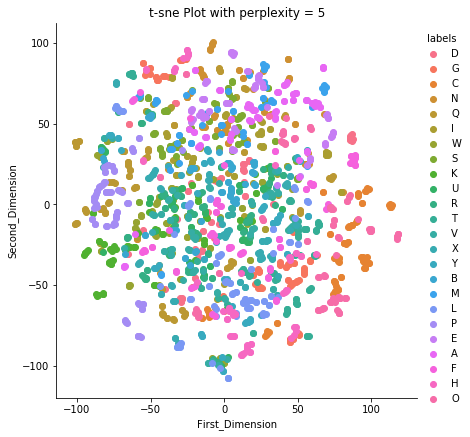

In [20]:
from sklearn.manifold import TSNE


final_data = standardised_data
final_labels = labels

model = TSNE(n_components=2, random_state=0,perplexity=5)

tsne_data = model.fit_transform(final_data)

# Creating pandas data frame by vertically stacking out tsne_data and labels

tsne_data = np.vstack((tsne_data.T, final_labels)).T
tsne_dataframe = pd.DataFrame(data=tsne_data, columns=("First_Dimension", "Second_Dimension", "labels"))

# Plotting using seaborn 

sns.FacetGrid(tsne_dataframe, hue="labels", size=6).map(plt.scatter, 'First_Dimension', 'Second_Dimension').add_legend()
plt.title("t-sne Plot with perplexity = 5")
plt.show()


# TSNE plot with perplexity = 25

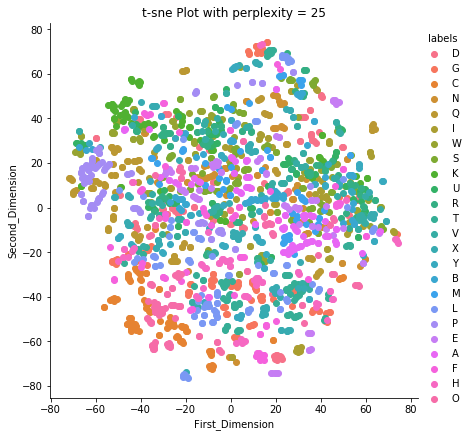

In [21]:
from sklearn.manifold import TSNE


final_data = standardised_data
final_labels = labels

model = TSNE(n_components=2, random_state=0,perplexity=25)

tsne_data = model.fit_transform(final_data)

# Creating pandas data frame by vertically stacking out tsne_data and labels

tsne_data = np.vstack((tsne_data.T, final_labels)).T
tsne_dataframe = pd.DataFrame(data=tsne_data, columns=("First_Dimension", "Second_Dimension", "labels"))

# Plotting using seaborn 

sns.FacetGrid(tsne_dataframe, hue="labels", size=6).map(plt.scatter, 'First_Dimension', 'Second_Dimension').add_legend()
plt.title("t-sne Plot with perplexity = 25")
plt.show()

# TSNE plot with perplexity=50

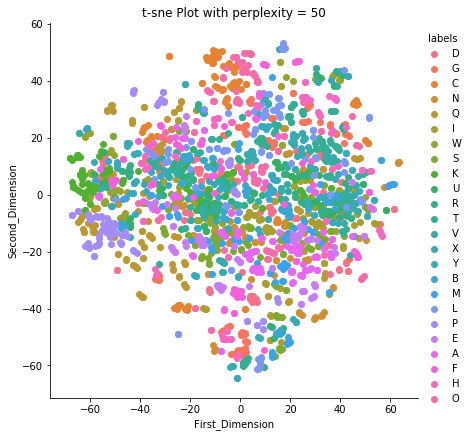

In [22]:
from sklearn.manifold import TSNE


final_data = standardised_data
final_labels = labels

model = TSNE(n_components=2, random_state=0,perplexity=50)

tsne_data = model.fit_transform(final_data)

# Creating pandas data frame by vertically stacking out tsne_data and labels

tsne_data = np.vstack((tsne_data.T, final_labels)).T
tsne_dataframe = pd.DataFrame(data=tsne_data, columns=("First_Dimension", "Second_Dimension", "labels"))

# Plotting using seaborn 

sns.FacetGrid(tsne_dataframe, hue="labels", size=6).map(plt.scatter, 'First_Dimension', 'Second_Dimension').add_legend()
plt.title("t-sne Plot with perplexity = 50")
plt.show()

# TSNE plot with n_iter = 500

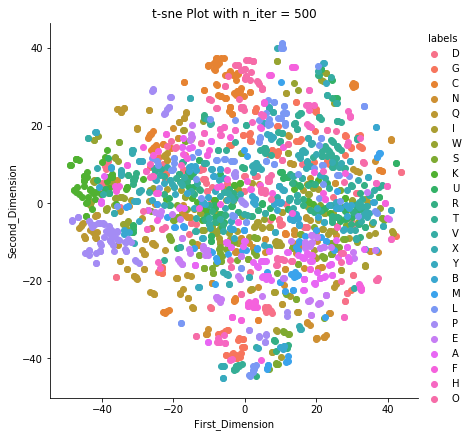

In [23]:
from sklearn.manifold import TSNE


final_data = standardised_data
final_labels = labels

model = TSNE(n_components=2, random_state=0,perplexity=50,n_iter = 500)

tsne_data = model.fit_transform(final_data)

# Creating pandas data frame by vertically stacking out tsne_data and labels

tsne_data = np.vstack((tsne_data.T, final_labels)).T
tsne_dataframe = pd.DataFrame(data=tsne_data, columns=("First_Dimension", "Second_Dimension", "labels"))

# Plotting using seaborn 

sns.FacetGrid(tsne_dataframe, hue="labels", size=6).map(plt.scatter, 'First_Dimension', 'Second_Dimension').add_legend()
plt.title("t-sne Plot with n_iter = 500")
plt.show()

# TSNE plot with n_iter = 250

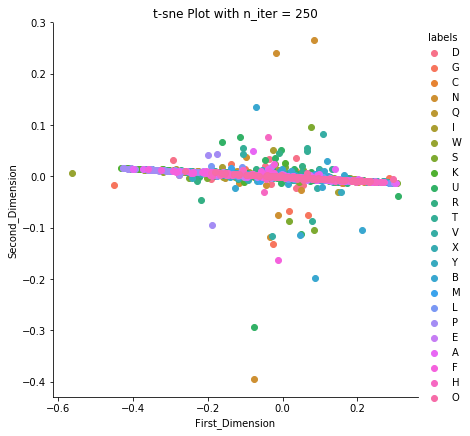

In [24]:
from sklearn.manifold import TSNE


final_data = standardised_data
final_labels = labels

model = TSNE(n_components=2, random_state=0,perplexity=50,n_iter = 250)

tsne_data = model.fit_transform(final_data)

# Creating pandas data frame by vertically stacking out tsne_data and labels

tsne_data = np.vstack((tsne_data.T, final_labels)).T
tsne_dataframe = pd.DataFrame(data=tsne_data, columns=("First_Dimension", "Second_Dimension", "labels"))

# Plotting using seaborn 

sns.FacetGrid(tsne_dataframe, hue="labels", size=6).map(plt.scatter, 'First_Dimension', 'Second_Dimension').add_legend()
plt.title("t-sne Plot with n_iter = 250")
plt.show()

<h><font color="red">CONCLUSION</font></h>
* ***The good parameters are perplexity=50 and n_iter=1000***
* <h><font color="blue">t-sne->incredibly flexible & can often find structures where other dimensionality reductions techniques cannot.But,this flexibility makes it difficult to interpret.</font>
* <h><font color="blue">Algorithm makes all sort of adjustments that tidy up visualisations which sometimes make something like overfitting sometimes.